# K-Means

### Setup

In [2]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Clustering-and-Anomaly-Detection"):
    raise ValueError("Please change working directory to 'path/to/Clustering-and-Anomaly-Detection' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Clustering-and-Anomaly-Detection


In [3]:
!pip install -r requirements.txt

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Generate Data

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data
y_iris = iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

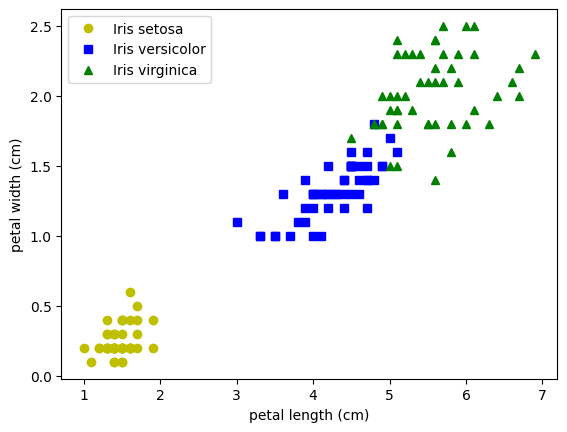

In [6]:
plt.plot(X_iris[y_iris==0, 2], X_iris[y_iris==0, 3], "yo",label="Iris setosa")
plt.plot(X_iris[y_iris==1, 2], X_iris[y_iris==1, 3], "bs", label="Iris versicolor")
plt.plot(X_iris[y_iris==2, 2], X_iris[y_iris==2, 3], "g^", label="Iris virginica")

plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()
plt.show()

In [7]:
from sklearn.datasets import make_blobs

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X_blobs, y_blobs = make_blobs(n_samples=3000, centers=blob_centers, cluster_std=blob_std, random_state=42)

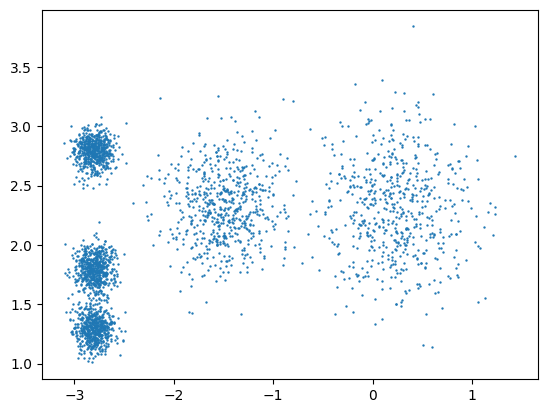

In [9]:
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], s=0.5)

plt.show()

## K-Means

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X_blobs)

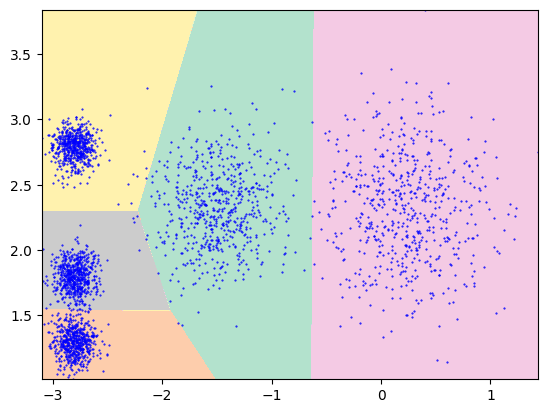

In [42]:
x1s = np.linspace(X_blobs[:, 0].min(), X_blobs[:, 0].max(), 500)
x2s = np.linspace(X_blobs[:, 1].min(), X_blobs[:, 1].max(), 500)

x1_mesh, x2_mesh = np.meshgrid(x1s, x2s)
X_coords = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]

y_pred_mesh = kmeans.predict(X_coords).reshape(x1_mesh.shape)

plt.plot(X_blobs[:, 0], X_blobs[:, 1], "bo", markersize=0.5)
plt.contourf(x1_mesh, x2_mesh, y_pred_mesh, cmap="Pastel2")
plt.show()